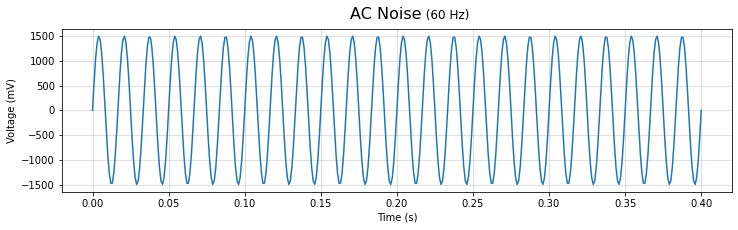

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 1500*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

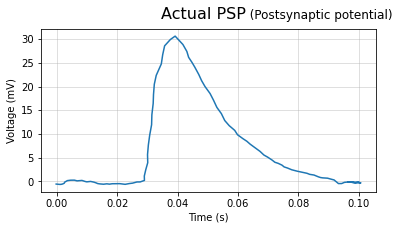

In [3]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

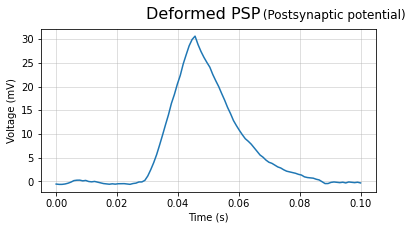

In [4]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

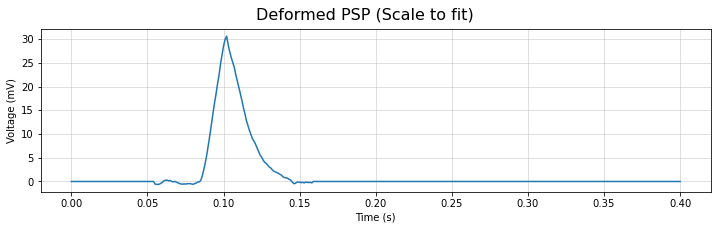

In [5]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [18]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_20 = np.array([0,20000,4])  # noise의 위치(20 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])


H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001
      
    
R_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
for i in range(n):
    for j in range(m):
        R_noi_20[i,j] = np.linalg.norm(sensor_array[i,j]-noi_20)

H_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (20 m)
for i in range(n):
    for j in range(m):
        H_noi_20[i,j] = noi_data/(2*np.pi*R_noi_20[i,j])

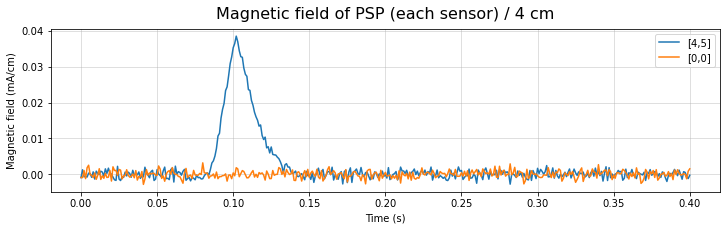

In [19]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

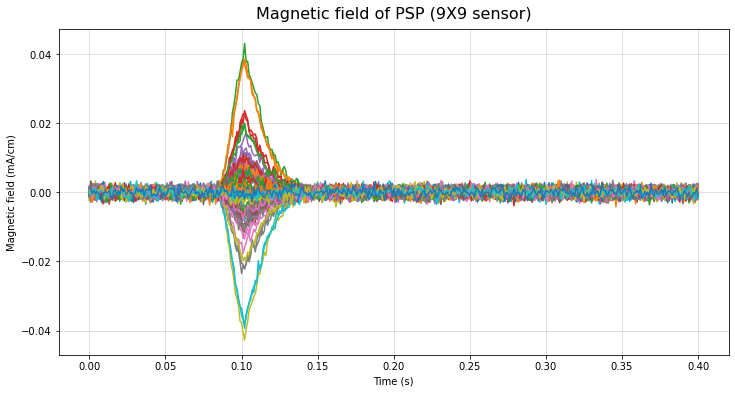

In [20]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

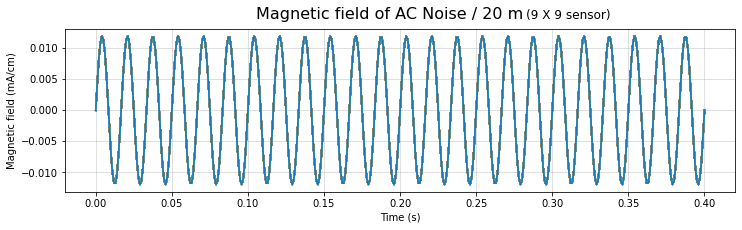

In [21]:
plt.figure(figsize=(12, 3))  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
plt.suptitle('Magnetic field of AC Noise / 20 m',size=16)
plt.title('                                                                                       (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_20[i,j])

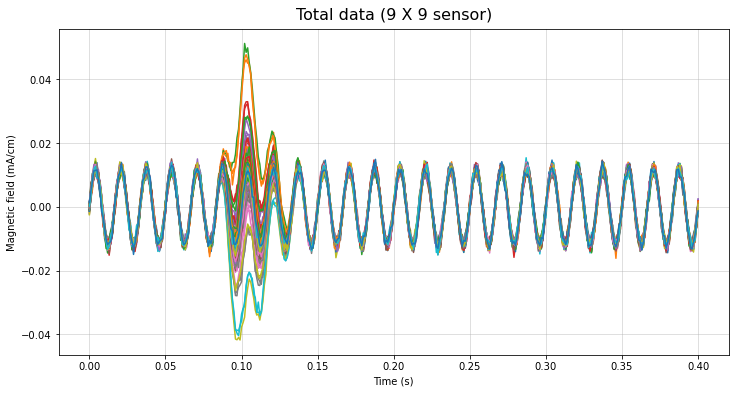

In [22]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터 (20 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_20[i,j])

In [23]:
H_all_f_20 = []  # 각각의 sensor 에서 받아들인 총 신호  (20 m)
for i in range(n):
    for j in range(m):
        H_all_f_20.append(list(H_sig[i,j] + H_noi_20[i,j]))
len(H_all_f_20)

81

In [24]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_20, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,-0.000885,0.003462,0.009217,0.009575,0.013728,0.013872,0.009071,0.005490,0.000581,-0.002588,...,0.002894,-0.000230,-0.005462,-0.009378,-0.011478,-0.011709,-0.010866,-0.009423,-0.003521,0.001516
Sensor_2,0.000550,0.005334,0.009120,0.009827,0.013734,0.012821,0.008447,0.004204,0.001275,-0.001907,...,0.003384,-0.001358,-0.006779,-0.009230,-0.012331,-0.012610,-0.010751,-0.008442,-0.005392,0.001200
Sensor_3,-0.001018,0.005591,0.009357,0.011860,0.011793,0.012183,0.010488,0.005343,0.001453,-0.003751,...,0.004752,-0.003857,-0.005740,-0.009809,-0.011662,-0.011483,-0.011281,-0.006818,-0.004816,-0.000894
Sensor_4,0.001648,0.004507,0.008555,0.011608,0.012936,0.011190,0.010152,0.006250,0.001127,-0.006334,...,0.004210,-0.001153,-0.004770,-0.009860,-0.012905,-0.011192,-0.010185,-0.011082,-0.005127,0.001428
Sensor_5,-0.001596,0.005553,0.007310,0.008507,0.011822,0.010281,0.010017,0.005914,0.001621,-0.001277,...,0.003118,-0.001474,-0.006987,-0.008965,-0.011696,-0.013896,-0.012024,-0.006609,-0.003248,-0.000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,-0.000326,0.005130,0.006752,0.011555,0.013330,0.012187,0.009020,0.005906,0.003604,-0.000998,...,0.002189,-0.002020,-0.005375,-0.009958,-0.011423,-0.011789,-0.009954,-0.007595,-0.003836,0.000075
Sensor_78,-0.000928,0.003782,0.007535,0.010235,0.011691,0.013311,0.007961,0.006768,0.003029,-0.003982,...,0.004518,-0.001873,-0.006112,-0.010161,-0.011600,-0.011800,-0.009939,-0.009001,-0.003762,0.000758
Sensor_79,0.000867,0.004034,0.008034,0.010247,0.011220,0.010738,0.009876,0.006694,0.003378,-0.002819,...,0.001553,-0.002108,-0.006756,-0.010058,-0.012647,-0.010691,-0.011288,-0.006664,-0.005221,0.000749
Sensor_80,0.000229,0.003610,0.008761,0.011820,0.012747,0.009081,0.009078,0.006335,0.001784,-0.003100,...,0.003850,-0.001448,-0.005217,-0.007571,-0.009558,-0.012383,-0.011117,-0.010532,-0.004776,-0.001844


In [25]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [26]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [27]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [28]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9248.17 %
PC2 =  624.44 %
PC3 =  3.38 %
PC4 =  3.33 %


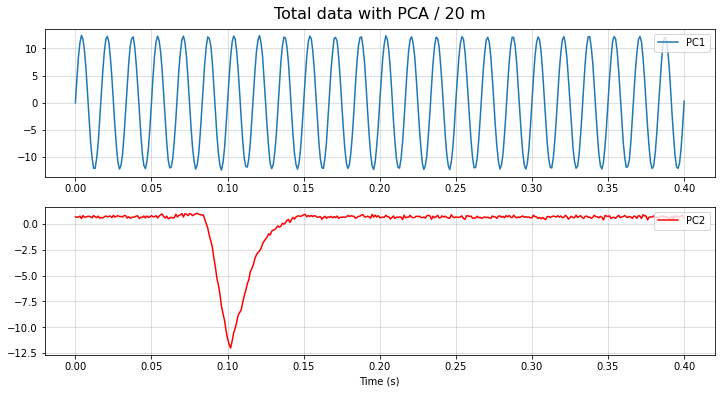

In [29]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 20 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');

In [17]:
eig_vecs.shape

(81, 81)